Fit a logistic regression model to classify neural events using the fourier data from eeg signals

In [22]:
import numpy as np
import pandas as pd
import sklearn.datasets as skdata
import sklearn.metrics as skmetrics
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression

In [31]:
# MAKE SURE TO CHANGE THIS TO THE LOCAL PATH TO DATA
#TRAIN_PATH = "../augmented_train/reformatted_train_106800_samples.csv"
TRAIN_PATH = "train_2000_samples_0_to_10_hz.csv"

data = pd.read_csv(TRAIN_PATH)

data_np = data.to_numpy()

print(data_np)
print(data_np.shape)

[[5065.72021484375 28115.97999401763 65569.51706718598 ...
  0.901803601889001 0.8857128390944005 'LRDA']
 [14423.5732421875 162853.19020454586 61641.43302383053 ...
  1.8046722545066805 1.8364386089556464 'LPD']
 [2349.529541015625 98494.8002279345 22347.239920282827 ...
  -3.0507936957251056 -2.574234764329917 'GRDA']
 ...
 [1062.7135009765625 12346.930009016767 8395.68723165329 ...
  0.4304051225242971 1.26509404047946 'LRDA']
 [657.9071655273438 9621.829995881766 11527.096058078663 ...
  -2.730690749395315 -1.8888741217150296 'LPD']
 [3021.898681640625 24597.3399156332 12234.02939865945 ...
  1.1507455189428752 -1.885184299471176 'GRDA']]
(1980, 2421)


In [32]:
num_input = data_np.shape[1] - 1

x = data_np[:, 0:num_input]
y = data_np[:, num_input]

# Shuffle the dataset based on sample indices
shuffled_indices = np.random.permutation(x.shape[0])

# Choose the first 80% as training set, next 10% as validation and the rest as testing
train_split_idx = int(0.80 * x.shape[0])
val_split_idx = int(0.90 * x.shape[0])

train_indices = shuffled_indices[0:train_split_idx]
val_indices = shuffled_indices[train_split_idx:val_split_idx]
test_indices = shuffled_indices[val_split_idx:]

# Select the examples from x and y to construct our training, validation, testing sets
x_train, y_train = x[train_indices, :], y[train_indices]
x_val, y_val = x[val_indices, :], y[val_indices]
x_test, y_test = x[test_indices, :], y[test_indices]

In [33]:
# Test out a number of models
models = []
val_scores = []

solver = 'newton-cg'
penalties = ['none', 'l2']  
num_iterations = [150, 250, 350, 450]

for penalty in penalties:

    for iter in num_iterations:

        model = LogisticRegression(solver=solver, max_iter = iter, penalty=penalty)

        model.fit(x_train, y_train)

        models.append(model)

        predictions_train = model.predict(x_train)
        score_train = model.score(x_train, y_train)

        predictions_val = model.predict(x_val)
        score_val = model.score(x_val, y_val)

        val_scores.append(score_val)

        print('Solver: {}, Iterations: {}, Penalty: {}'.format(solver, iter, penalty))
        print('Training accuracy: {:0.5f}  Validation accuracy: {:0.2f}%'.format(score_train*100, score_val*100))

# Choose the best model based on highest validation accuracy
print(val_scores)
best_model_idx = np.argmax(val_scores)
best_model = models[best_model_idx]


# Sanity check
print('\nBest Penalty: {}'.format(penalties[best_model_idx // len(num_iterations)]))
print('Best Iterations: {}'.format(num_iterations[best_model_idx % len(num_iterations)]))

# Best solver on the test set
predictions_test = best_model.predict(x_test)
score_test = best_model.score(x_test, y_test)

print("The test results.... {:0.2f}%".format(score_test*100))

c:\Users\brenn\anaconda3\envs\ml_new\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


Solver: newton-cg, Iterations: 150, Penalty: none
Training accuracy: 77.58838  Validation accuracy: 40.40%


c:\Users\brenn\anaconda3\envs\ml_new\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


Solver: newton-cg, Iterations: 250, Penalty: none
Training accuracy: 89.89899  Validation accuracy: 38.38%


c:\Users\brenn\anaconda3\envs\ml_new\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


Solver: newton-cg, Iterations: 350, Penalty: none
Training accuracy: 95.39141  Validation accuracy: 41.92%


c:\Users\brenn\anaconda3\envs\ml_new\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


Solver: newton-cg, Iterations: 450, Penalty: none
Training accuracy: 97.79040  Validation accuracy: 41.92%


c:\Users\brenn\anaconda3\envs\ml_new\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


Solver: newton-cg, Iterations: 150, Penalty: l2
Training accuracy: 76.95707  Validation accuracy: 39.90%


c:\Users\brenn\anaconda3\envs\ml_new\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


Solver: newton-cg, Iterations: 250, Penalty: l2
Training accuracy: 89.39394  Validation accuracy: 40.40%


c:\Users\brenn\anaconda3\envs\ml_new\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


Solver: newton-cg, Iterations: 350, Penalty: l2
Training accuracy: 93.56061  Validation accuracy: 42.93%


c:\Users\brenn\anaconda3\envs\ml_new\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


Solver: newton-cg, Iterations: 450, Penalty: l2
Training accuracy: 97.47475  Validation accuracy: 41.41%
[0.40404040404040403, 0.3838383838383838, 0.41919191919191917, 0.41919191919191917, 0.398989898989899, 0.40404040404040403, 0.4292929292929293, 0.41414141414141414]

Best Penalty: l2
Best Iterations: 350
The test results.... 40.40%


Text(0.5, 1.0, 'Accuracy Score: 0.37373737373737376')

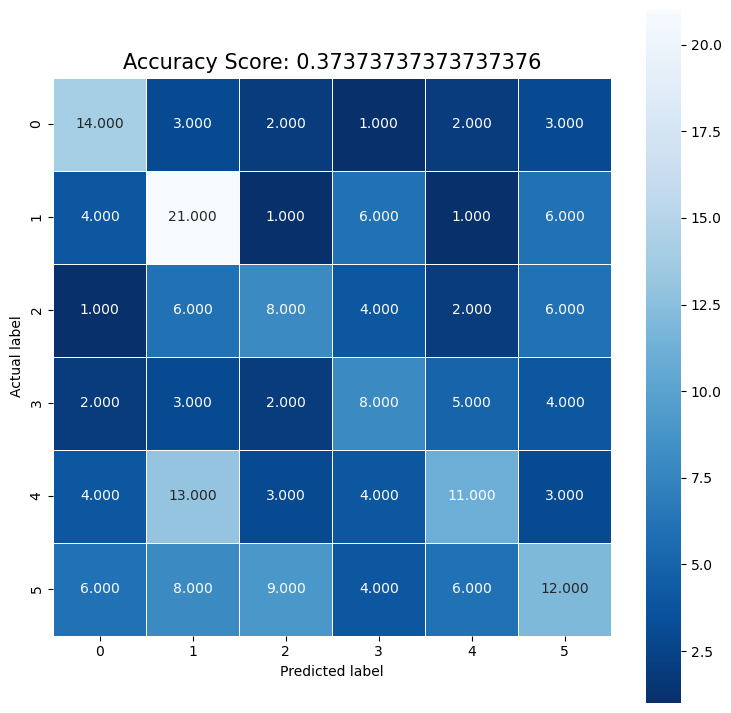

In [30]:
cm = skmetrics.confusion_matrix(y_test, predictions_test)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score_test)
plt.title(all_sample_title, size = 15)

In [19]:
kullback_leibler_train = skmetrics.mutual_info_score(y_train, predictions_train)
kullback_leibler_test = skmetrics.mutual_info_score(y_test, predictions_test)

print(kullback_leibler_train)
print(kullback_leibler_test)

1.3861240907672023
1.107942757778892
